### Pipeline

In [3]:
import pandas as pd

red_wine = pd.read_csv('winequality-red.csv',sep=';')
white_wine = pd.read_csv('winequality-white.csv',sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.
wine = pd.concat([red_wine,white_wine])

X = wine.drop(['color'], axis=1)
y = wine['color']


### 레드/화이트 와인 분류기 동작 Process

#### StandardScaler() -> test_train_split() -> DecisionTreeClassifier()


In [5]:
# 위 동작을 pipeline 코드로 구현 

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators= [
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
]

pipe = Pipeline(estimators)

In [6]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [7]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

#### set_params

In [8]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                     random_state=13,
                                                    stratify=y)

In [10]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3437,6.7,0.40,0.22,8.8,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,5
2124,7.7,0.39,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7
3005,6.9,0.30,0.36,0.9,0.037,40.0,156.0,0.98968,3.08,0.36,12.1,6
2436,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5
444,6.9,0.24,0.36,20.8,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4710,5.4,0.33,0.31,4.0,0.030,27.0,108.0,0.99031,3.30,0.43,12.2,7
44,6.7,0.23,0.26,1.4,0.060,33.0,154.0,0.99340,3.24,0.56,9.5,6
1987,8.1,0.22,0.28,7.7,0.043,57.0,176.0,0.99540,3.12,0.55,10.0,5
2422,6.2,0.44,0.18,7.7,0.096,28.0,210.0,0.99771,3.56,0.72,9.2,5


In [11]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [13]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train ACC : ',accuracy_score(y_train, y_pred_tr))
print('Test ACC : ',accuracy_score(y_test, y_pred_test))


Train ACC :  0.9657494708485664
Test ACC :  0.9576923076923077


In [20]:
# %load ../set_matplotlib_hangul.py

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# %matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

path='C:/Windows/Fonts/malgun.ttf'
plt.rcParams['axes.unicode_minus'] = False

if platform.system()=="Darwin": #mac
    rc("font",family='Arial Unicodes MS')
    sns.set(font='Arial Unicodes MS', 
        rc={"axes.unicode_minus":False}),
    print('MAC Hangul OK')
elif platform.system()=="Windows":  #window
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc("font",family=font_name)
    sns.set(font=font_name, 
    rc={"axes.unicode_minus":False})
    print('WIndow Hangul OK')
    
else:
    print('Unknown System')
    


WIndow Hangul OK


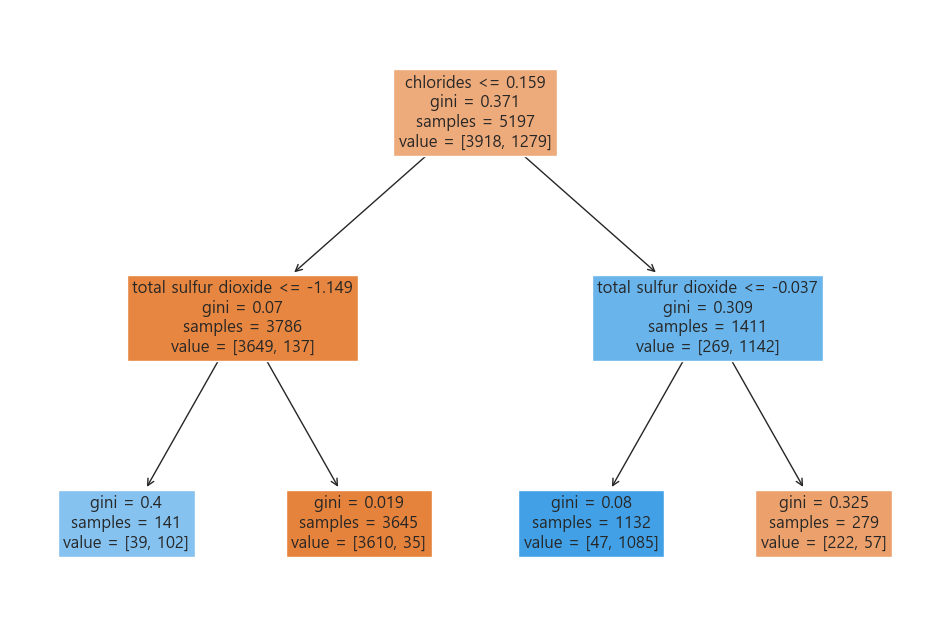

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
clf = pipe.named_steps['clf']
plot_tree(clf, feature_names=X.columns, filled=True);


### 하이퍼파라미터 튜닝 - 교차검증 
- 과적합 : 모델이 학습 데이터에만 과도하게 최적화된 현상, 그로인해 일반화된 데이터에서는 예측 성능이 과하게 떨어지는 현상 

#### k-fold cross validation

    이 기법은 데이터를 훈련 세트와 검증 세트로 나누어 모델을 여러 번 학습 및 평가하는 과정을 포함합니다.

    k-fold 교차 검증의 주요 아이디어는 다음과 같습니다. 
    먼저, 사용 가능한 데이터를 k개의 동일한 크기로 분할합니다. 각각의 분할은 "폴드"라고 불리며 번호가 매겨집니다. 
    그런 다음, 모델을 훈련하기 위해 k-1개의 폴드를 사용하고 나머지 1개의 폴드를 검증 세트로 사용합니다. 
    이 과정을 k번 반복하면 모든 폴드가 한 번씩 검증 세트로 사용되며, 모델의 성능은 k개의 검증 점수를 평균 내어 얻을 수 있습니다.

In [27]:
import numpy as np
from sklearn.model_selection import KFold

In [30]:
X = np.array([
    [1,2],[3,4],[1,2],[3,4]
])

y = np.array([1, 2, 3, 4])

In [33]:
kf = KFold(n_splits=2)
print(kf.get_n_splits(X))
print(kf)

2
KFold(n_splits=2, random_state=None, shuffle=False)


In [38]:
for train_idx, test_idx in kf.split(X):
    print('--------idx--------')
    print(train_idx)
    print(test_idx)
    print('--------data-------')
    print(X[train_idx])
    print(X[test_idx])


--------idx--------
[2 3]
[0 1]
--------data-------
[[1 2]
 [3 4]]
[[1 2]
 [3 4]]
--------idx--------
[0 1]
[2 3]
--------data-------
[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [42]:
import pandas as pd

red_wine = pd.read_csv('winequality-red.csv',sep=';')
white_wine = pd.read_csv('winequality-white.csv',sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.
wine = pd.concat([red_wine,white_wine])


In [49]:
wine['taste'] = [1. if grade > 5 else 0. for grade in X['quality'] ]

X = wine.drop(['taste', 'quality'], axis=1)
Y = wine['taste']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13) 

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))


0.7294593034442948
0.7161538461538461


### 데이터를 저렇게 분리하는것이 최선인가?

### KFold를 이용한 교차검증

In [51]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

In [55]:
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx) ,len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [56]:
cv_accuracy = []
for train_idx, test_idx in kfold.split(X):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = Y.iloc[train_idx]
    y_test = Y.iloc[test_idx]

    wine_tree_cv.fit(X_train,y_train)
    pred = wine_tree_cv.predict(X_test)

    cv_accuracy.append(accuracy_score(y_test,pred))
    
cv_accuracy

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [57]:
np.mean(cv_accuracy)

0.709578255462782

#### StratifiedKFold
    각 폴드에서 클래스의 비율이 원본 데이터셋과 비슷하게 유지되도록 보장합니다. 
    이는 클래스 간 불균형한 분포가 있는 경우 모델의 성능을 정확하게 평가하는 데 도움이 됩니다.

    예를 들어, StratifiedKFold(n_splits=3)를 사용하여 데이터셋을 3개의 폴드로 분할한다면 각 폴드 내에서 클래스의 비율이 유지됩니다. 
    이는 클래스 간의 분포가 불균형한 경우에 유용합니다. 
    예를 들어, 양성 클래스와 음성 클래스가 9:1의 비율로 구성된 데이터셋에서 StratifiedKFold를 사용하면 각 폴드에서 양성 클래스와 음성 클래스의 비율이 9:1로 유지됩니다.

In [60]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)


cv_accuracy = []
for train_idx, test_idx in kfold.split(X,Y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = Y.iloc[train_idx]
    y_test = Y.iloc[test_idx]

    wine_tree_cv.fit(X_train,y_train)
    pred = wine_tree_cv.predict(X_test)

    cv_accuracy.append(accuracy_score(y_test,pred))
    
cv_accuracy

[0.5523076923076923,
 0.6884615384615385,
 0.7143956889915319,
 0.7321016166281755,
 0.7567359507313318]

In [61]:
np.mean(cv_accuracy)

0.6888004974240539

### cross_val_score
Scikit-learn 라이브러리에서 제공되는 교차 검증을 간편하게 수행하는 함수입니다. 이 함수는 주어진 모델과 데이터에 대해 교차 검증을 수행하고, 각 폴드의 검증 점수를 반환합니다.

In [62]:
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, X, Y, cv=skfold)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

#### train score도 함께 보기
- train 정확도에 비해서 test 데이터의 정확도가 낮은걸 보아 과적합이 의심됨

In [65]:
from sklearn.model_selection import cross_validate

cross_validate(wine_tree_cv, X, Y, cv=skfold, return_train_score=True)

{'fit_time': array([0.03292465, 0.03290963, 0.0264504 , 0.0249455 , 0.02194071]),
 'score_time': array([0.00397515, 0.00299335, 0.00299191, 0.00298166, 0.00199819]),
 'test_score': array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772]),
 'train_score': array([0.78795459, 0.78045026, 0.77568295, 0.76356291, 0.76279338])}

#### 성능 향상 시키기

1. max_depth 높이기 
- 성능이 더 하락

In [68]:
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=5, random_state=13)

cv_accuracy = cross_val_score(wine_tree_cv, X, Y, cv=skfold)

print(cv_accuracy)
np.mean(cv_accuracy)

[0.50076923 0.62615385 0.69745958 0.7582756  0.74903772]


0.6663391958311127

2. 더 많은 데이터 분할 
- 성능 향상 

In [79]:
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=8)
wine_tree_cv = DecisionTreeClassifier(max_depth=5, random_state=13)

cv_accuracy = cross_validate(wine_tree_cv, X, Y, cv=skfold, return_train_score=True)['test_score']

print(cv_accuracy)
np.mean(cv_accuracy)


[0.63837638 0.7229064  0.62807882 0.68965517 0.68349754 0.81773399
 0.71674877 0.77832512]


0.7094152745714649

### Hyperparameter Tuning

    하이퍼파라미터 튜닝은 모델의 성능을 최적화하기 위해 모델의 하이퍼파라미터를 조정하는 과정입니다. 
    하이퍼파라미터는 모델 구조나 학습 알고리즘의 설정에 영향을 주는 매개변수입니다. 
    일반적으로 사용되는 하이퍼파라미터 튜닝 방법에는 그리드 서치(Grid Search), 랜덤 서치(Random Search), 베이지안 최적화(Bayesian Optimization) 등이 있습니다. 

    그리드 서치(Grid Search):
    그리드 서치는 가능한 모든 하이퍼파라미터 조합에 대해 모델을 학습하고 검증 세트를 통해 성능을 평가하는 방법입니다. 
    사용자가 사전에 지정한 하이퍼파라미터들의 모든 조합을 시도하여 최적의 조합을 찾습니다. 
    그러나 그리드 서치는 하이퍼파라미터 조합이 많은 경우 계산 비용이 매우 크고 시간이 오래 걸릴 수 있습니다.

    랜덤 서치(Random Search):
    랜덤 서치는 가능한 하이퍼파라미터 공간에서 무작위로 하이퍼파라미터를 선택하여 모델을 학습하고 검증 세트를 통해 성능을 평가하는 방법입니다. 
    그리드 서치와 달리 하이퍼파라미터 조합을 무작위로 선택하므로 계산 비용이 낮고 다양한 조합을 탐색할 수 있습니다. 
    하지만 최적의 조합을 찾는 데에는 그리드 서치보다 더 많은 시도가 필요할 수 있습니다.

    베이지안 최적화(Bayesian Optimization):
    베이지안 최적화는 이전 시도 결과를 기반으로 하이퍼파라미터 공간에서 가능성이 높은 하이퍼파라미터를 선택하여 모델을 학습하고 검증 세트를 통해 성능을 평가하는 방법입니다. 
    베이지안 최적화는 확률적 모델을 사용하여 이전 시도 결과에 대한 정보를 업데이트하고, 확률적인 방법을 통해 하이퍼파라미터 탐색을 수행합니다.
    이를 통해 계산 비용을 줄이면서도 최적의 조합을 찾을 수 있습니다.

<br>
<br>
    



<img src = 'https://static.packt-cdn.com/products/9781788479042/graphics/7bfa3d4d-e715-4306-9335-0b5f8b72924d.png' width = 600>

#### GridSearchCV
    GridSearchCV는 모델과 하이퍼파라미터 그리드를 입력으로 받아, 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 수행하여 최적의 조합을 찾습니다.

    GridSearchCV의 주요 매개변수

    estimator: 모델 객체를 입력으로 받습니다. 예를 들어, wine_tree는 분류나 회귀와 같은 모델 객체입니다.
    param_grid: 탐색할 하이퍼파라미터 그리드를 지정합니다. 딕셔너리 형태로 각 하이퍼파라미터의 가능한 값을 지정합니다. 
    - 예를 들어, params = {'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3]}와 같이 하이퍼파라미터의 가능한 값들을 리스트로 지정합니다.
    cv: 교차 검증 분할 방법을 지정합니다. 기본적으로는 정수값으로 k-fold의 k값을 입력합니다. 
    또는 StratifiedKFold나 KFold와 같은 교차 검증 분할 객체를 입력할 수도 있습니다.

    그 외의 다른 매개변수: GridSearchCV는 다양한 매개변수를 지원합니다. 
    - 예를 들어, scoring은 성능 평가 지표를 지정하고, n_jobs는 병렬 처리에 사용할 CPU 코어 수를 지정합니다.


    GridSearchCV는 모든 하이퍼파라미터 조합에 대해 교차 검증을 수행하여 최적의 조합을 찾습니다. 
    각 조합에서는 입력한 모델과 지정된 교차 검증 방법을 활용하여 성능을 평가합니다. 
    최종적으로는 최고의 성능을 보이는 하이퍼파라미터 조합을 찾아 반환합니다.

In [81]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [2, 4, 7, 10]}

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

In [82]:
gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(X,Y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [84]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.01735897, 0.02244401, 0.02597327, 0.03774228]),
    'mean_score_time': array([0.00548921, 0.00279226, 0.00238342, 0.00359554]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4]),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
    'std

In [85]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [86]:
gridsearch.best_score_

0.6888004974240539

In [87]:
gridsearch.best_params_

{'max_depth': 2}

#### pipe 라인에 gridsearch 적용 

In [89]:

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators= [
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
]

pipe = Pipeline(estimators)

In [90]:
param_grid = [{'clf__max_depth' : [2,4,7,10]}]
GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X, Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [91]:
GridSearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2))])

In [92]:
GridSearch.best_score_

0.6888004974240539

In [93]:
import pandas as pd
score_df = pd.DataFrame(GridSearch.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026942,0.005011,0.005384,0.001350,2,{'clf__max_depth': 2},0.552308,0.688462,0.714396,0.732102,0.756736,0.688800,0.071799,1
1,0.026249,0.002346,0.004181,0.000748,4,{'clf__max_depth': 4},0.512308,0.631538,0.723634,0.732102,0.718245,0.663565,0.083905,2
2,0.038199,0.003711,0.005397,0.000997,7,{'clf__max_depth': 7},0.503846,0.603846,0.678984,0.739030,0.735181,0.652177,0.088870,3
3,0.065959,0.005335,0.004188,0.000977,10,{'clf__max_depth': 10},0.514615,0.608462,0.669746,0.715166,0.715166,0.644631,0.075886,4


In [96]:
score_df[['params','rank_test_score','mean_test_score','std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.652177,0.088870
3,{'clf__max_depth': 10},4,0.644631,0.075886
